# IMDb web scraping
 
 The goal of this notebook is to familiarize myself with web scraping using the ``BeautifulSoup`` library and bonus point if I can get myself some movie plans for the weekends :).

I decided to scrap the IMDb website which is the reference site when it comes to movies and series in order to find the best 5 movies/series sorted by language or by genre. For the languages, I picked french, spanish, italian, japanese, korean, turkish, russian and german and for the genres I picked action, comedy, sience fiction, horror, fantasy, animation, thriller and war.

In order to find the best 5 movies/series for each language and genre, I picked at first the 100 most famous movies/series according to the number of votes and among those 100 I kept the 5 with the best user rating. Finally, I plotted the results using ``seaborn`` barplot.

In [23]:
import requests
from bs4 import BeautifulSoup
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [145]:
languages = ['fr','es','it','ja','ko','tr','ru','de']
lg = ['french', 'spanish', 'italian', 'japanese','korean', 'turkish','russian','german']
genres = ['action', 'comedy', 'sci-fi', 'horror', 'fantasy', 'animation', 'thriller','war']

links_languages = ['https://www.imdb.com/search/title/?title_type=feature&primary_language='+ i \
                   +'&sort=num_votes,desc&count=100' for i in languages ]
links_genres  = ['https://www.imdb.com/search/title/?genres=' + i +'&sort=num_votes,desc&count=100' for i in genres]

In [146]:
def create_df(link):
    movies=[]
    ratings = []
    years = []
    page = requests.get(link)
    soup = BeautifulSoup(page.content, 'html.parser')


    for h3 in soup.find_all('h3', attrs={'class':'lister-item-header'}):   #scraping the movie title
        for a in h3.find_all('a'):
                movies.append(a.text)

    for div in soup.find_all('div', attrs={'class':'inline-block ratings-imdb-rating'}):   #scraping the ratings
        for r in div.find_all('strong'):
                ratings.append(r.text)

    for h3 in soup.find_all('h3', attrs={'class':'lister-item-header'}):   #scraping the years
        for a in h3.find_all('span', attrs={'text-muted'}):
                years.append(a.text)
    
    if movies[94]=='Long, Long Time':             # There is a little problem at the time I made this
        movies.remove('Long, Long Time')          #in the horror section link there are 101 elements instead of 100
        years.remove(years[94])
                                                
    
    dic = {'Movie' : movies, 'Year' : years, 'Rating' : ratings}   #creating the dataframe
    df = pd.DataFrame(dic)
    df.Rating = pd.to_numeric(df.Rating)
    
    return df.nlargest(5,"Rating")     #best 5 ratings

def plot_data(df, l, i):
    g = sns.barplot(data=df, x='Rating', y='Movie', hue='Year', dodge = False, ax=axes[i])
    axes[i].set(title = f"Top 5 best {l} movies/series according to IMDB user ratings")
    g.set_xlim(7,9.5)
    g.set(xlabel=None)
    g.set(ylabel=None)
    


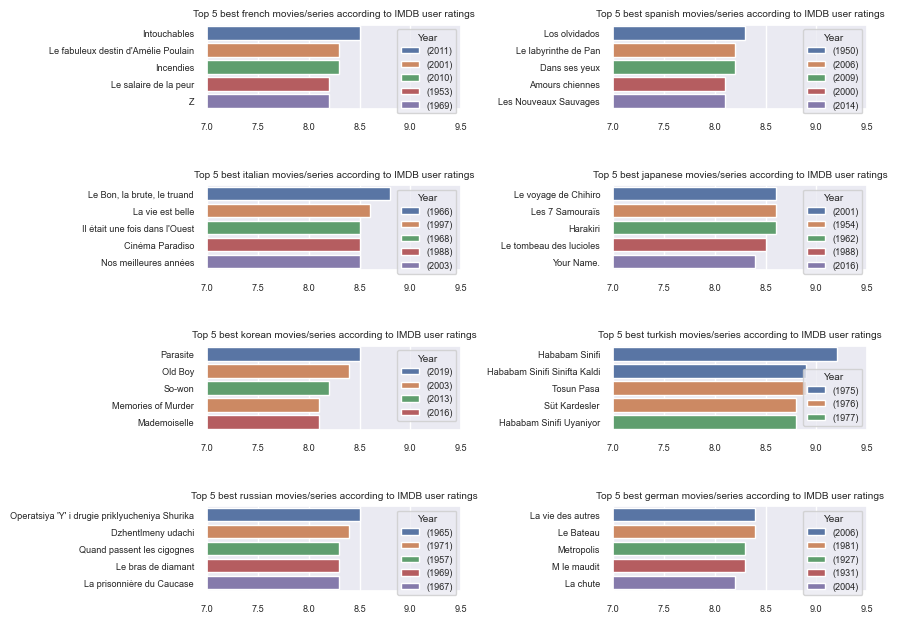

In [148]:
sns.set(font_scale=0.6)

f, axes = plt.subplots(4, 2, figsize=(7,6))
axes = axes.flatten()
f.tight_layout(pad=0.4, w_pad=12, h_pad=5)


for i,l in enumerate(zip(links_languages,lg)):
    df = create_df(l[0])
    plot_data(df,l[1],i)

plt.show()


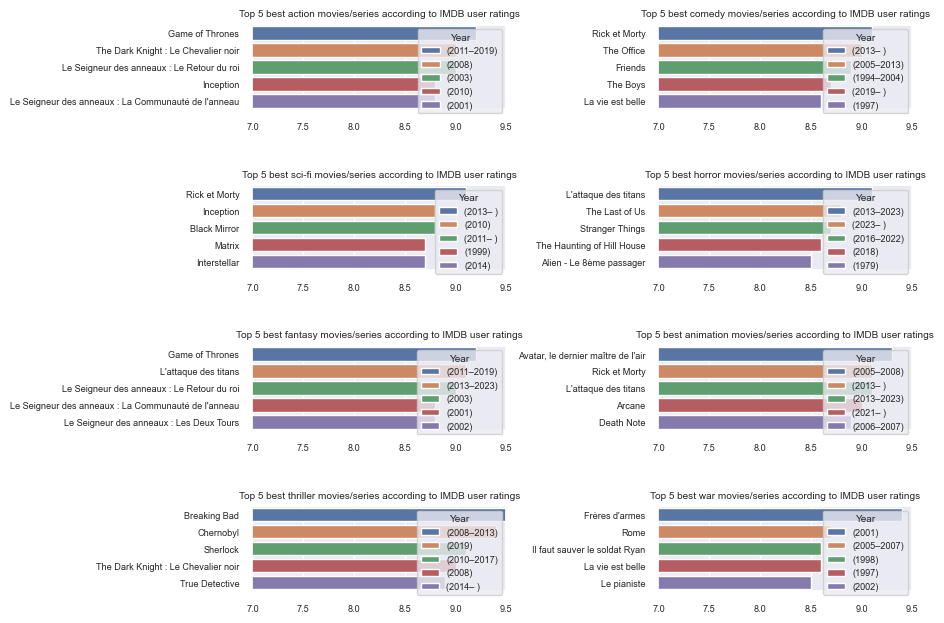

In [149]:
sns.set(font_scale=0.6)

f, axes = plt.subplots(4, 2, figsize=(7,6))
axes = axes.flatten()
f.tight_layout(pad=0.4, w_pad=12, h_pad=5)


for i,l in enumerate(zip(links_genres,genres)):
    df = create_df(l[0])
    plot_data(df,l[1],i)

plt.show()